<a href="https://colab.research.google.com/github/Nicoflyy/Python_Basic/blob/main/Segundo_parcial_SyS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PUNTO 2.1**
Encuentre la expresión del espectro de Fourier (forma exponencial y trigonométrica) para la señal $x(t)=|6\sin(3t+\pi/4)|^2$, con $t\in [-\pi, \pi]$.

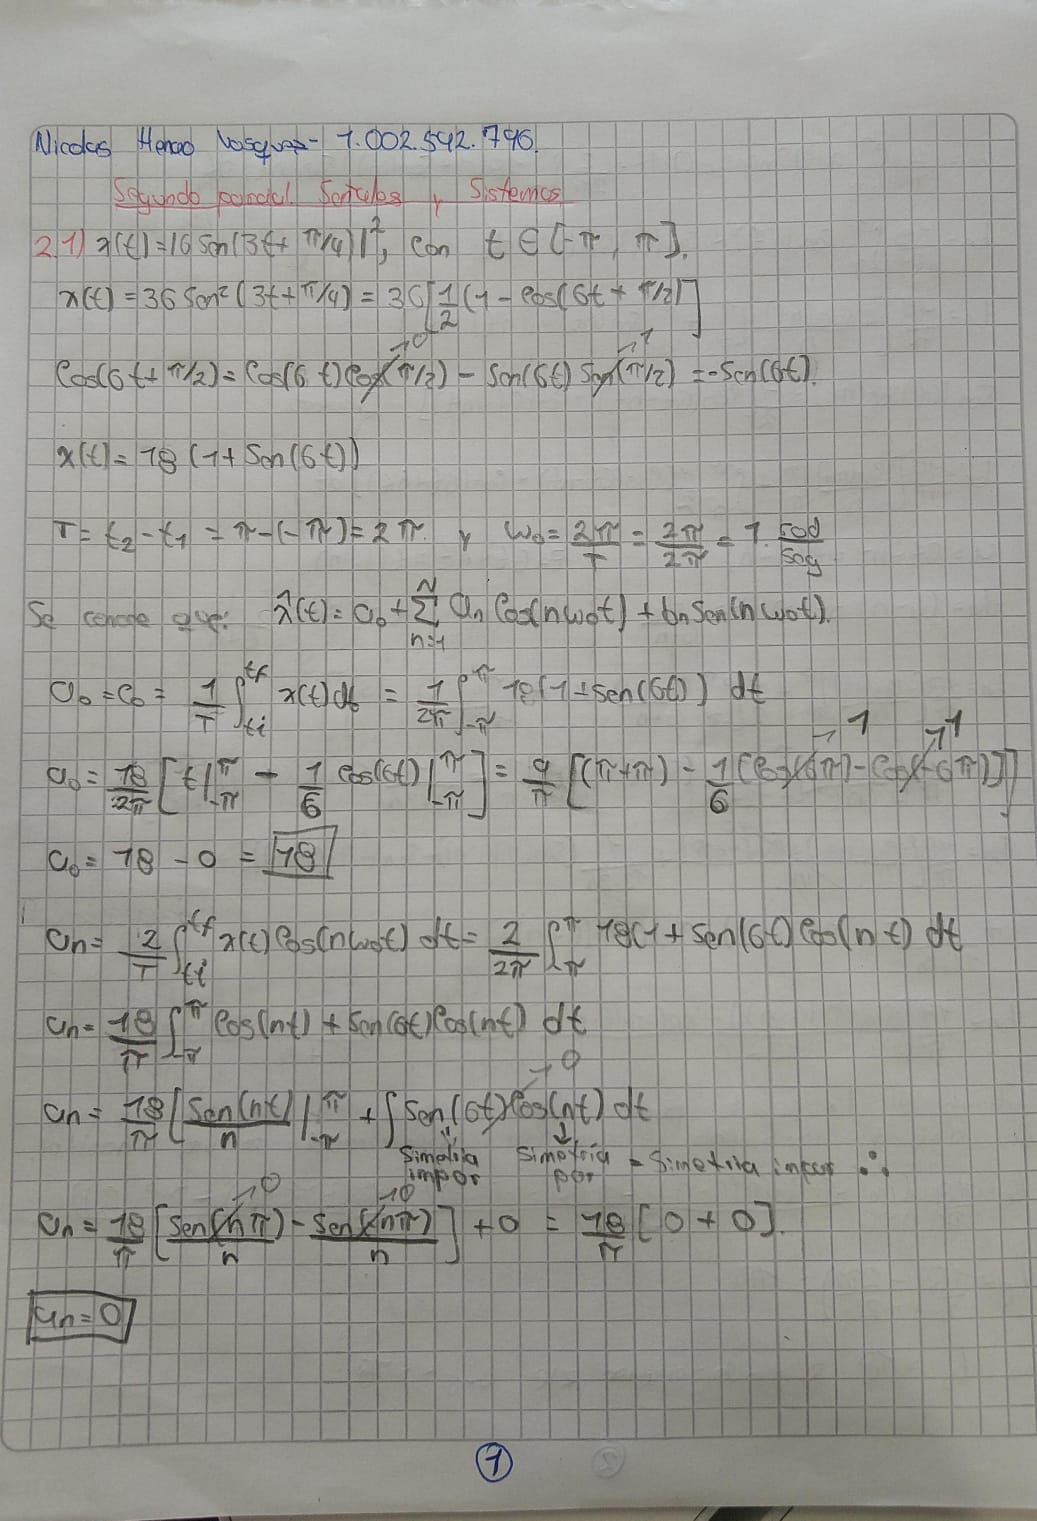
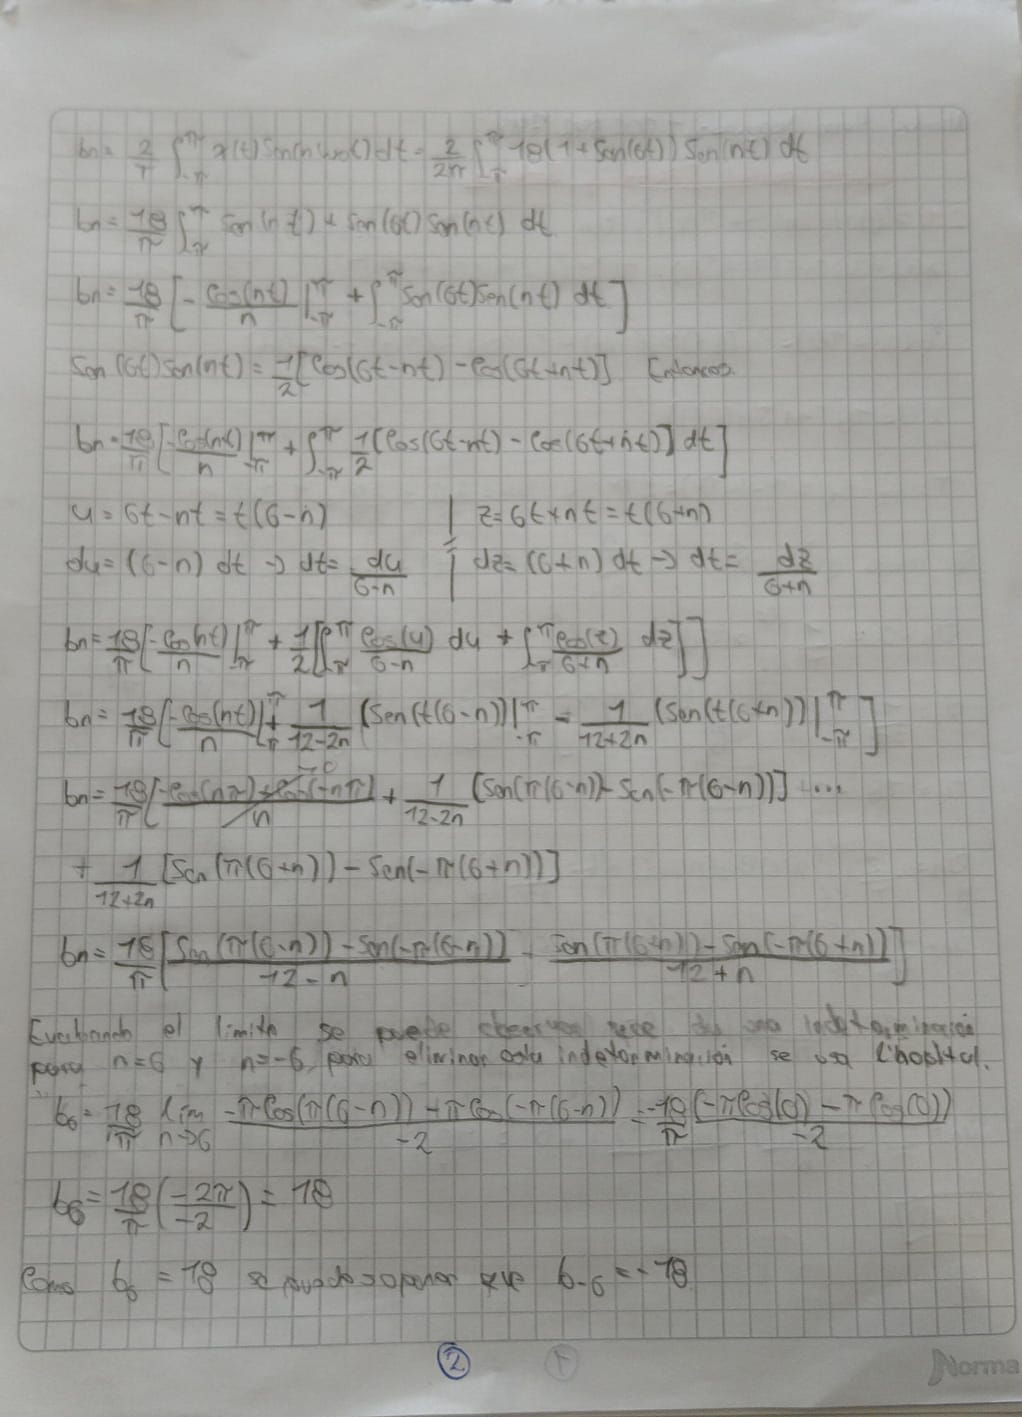
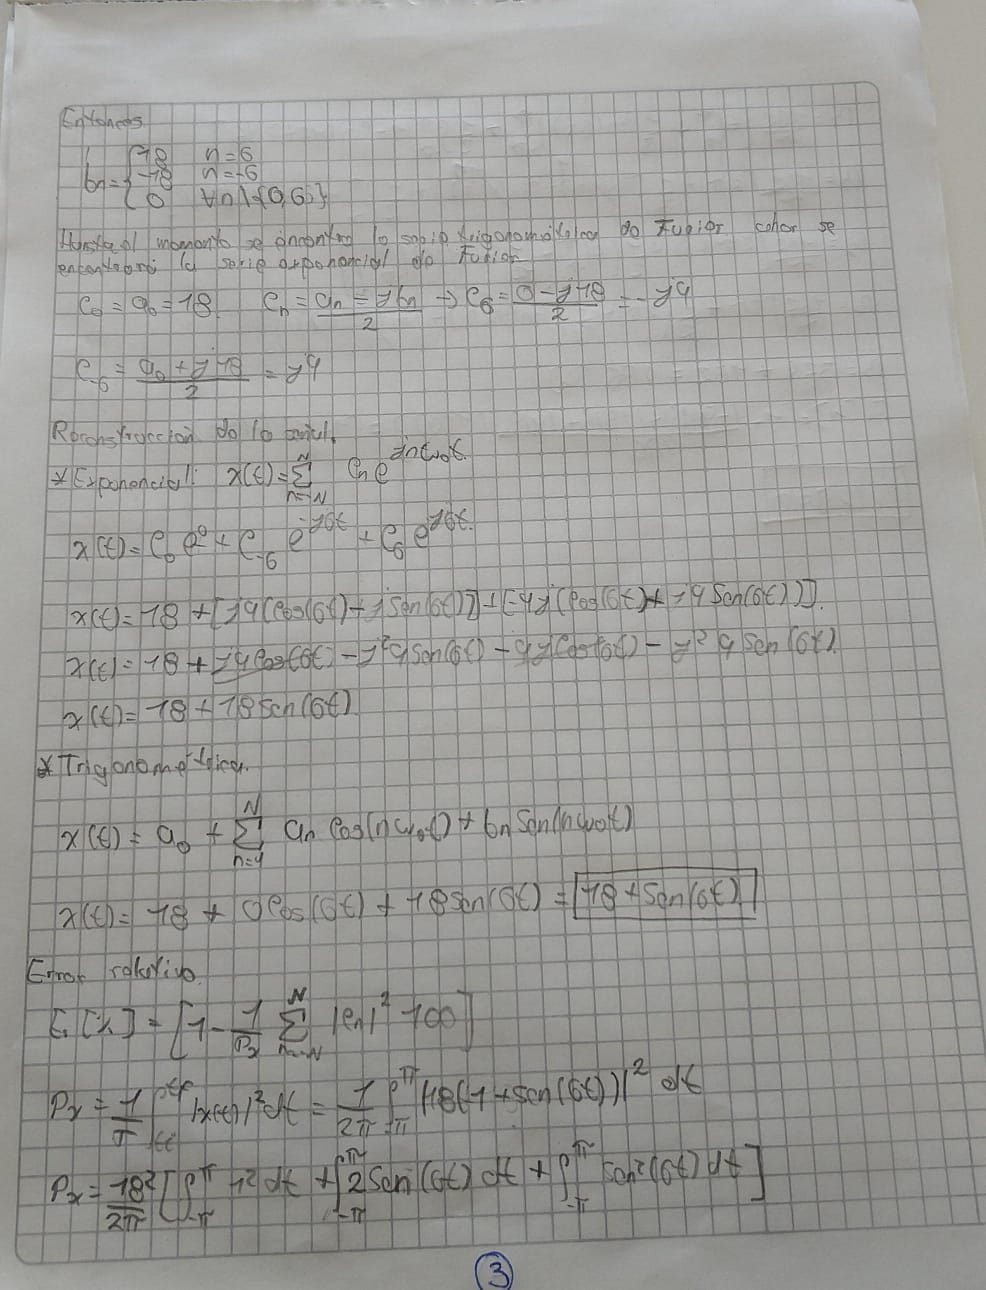
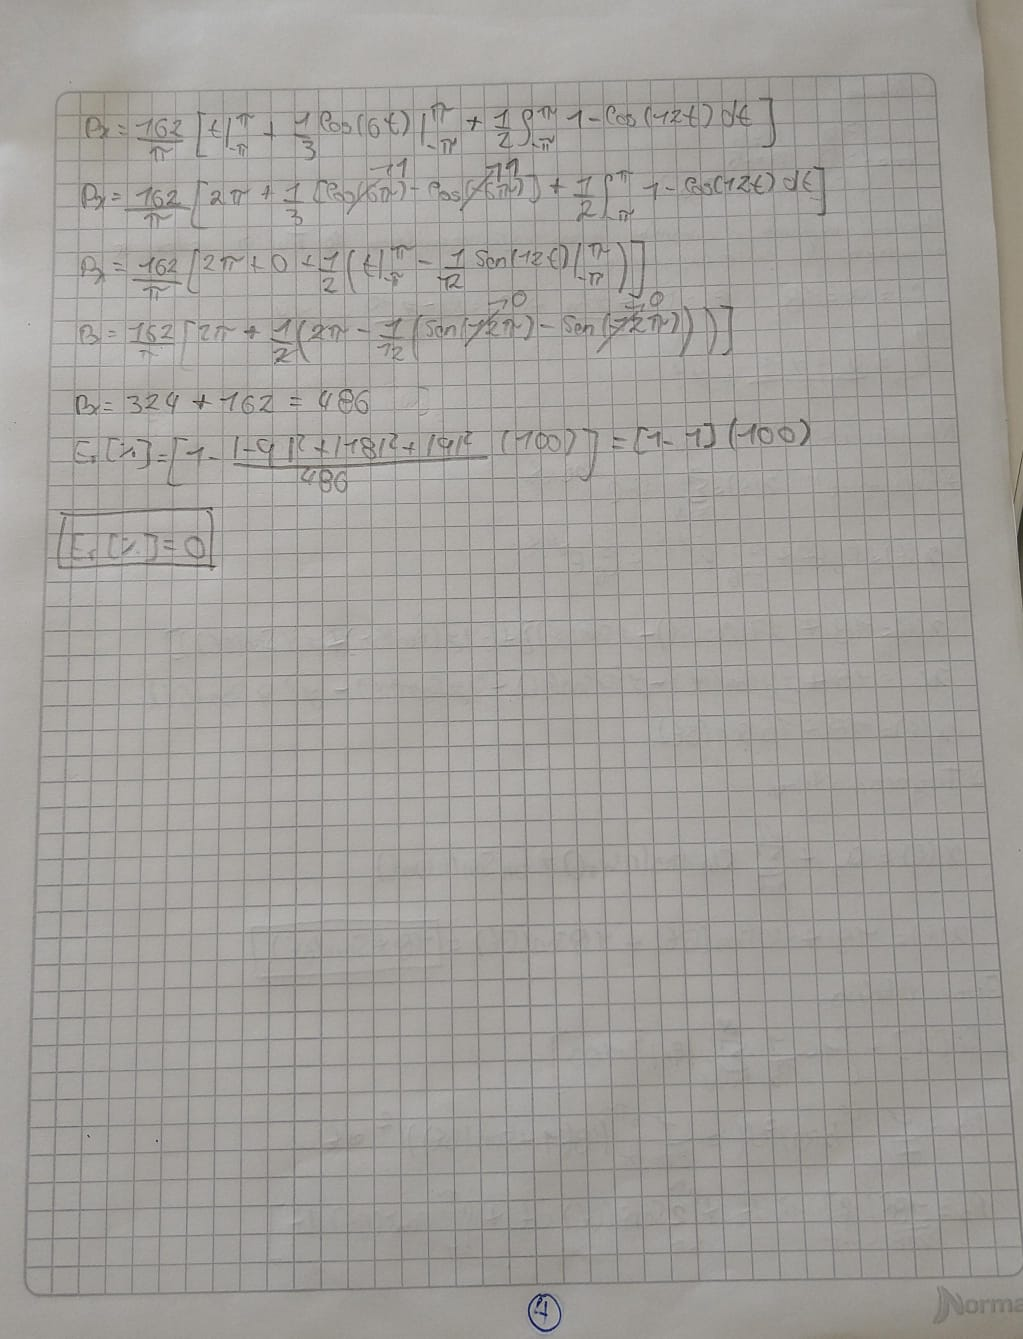

wo= 1.0
Fo= 1.5707963267948966


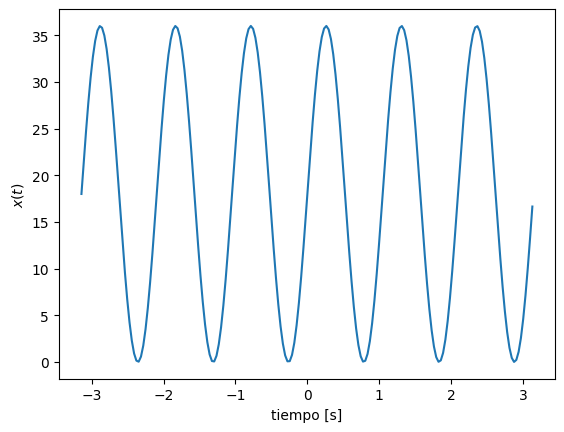

In [106]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact,IntSlider

#Se dedinen los valores de la señal de entrada y se grafica
ti = -np.pi #tiempo inicial
tf = np.pi #tiempo final
wo = 2*np.pi/(tf-ti) #frecuencia angular
Fo = wo/2*np.pi #frecuencia fundamental
print('wo=',wo)
print('Fo=',Fo)
Fs = 20*Fo #frecuencia muestreo -> debe respetar Nyquist Fs >= 2 Fo
tv = np.arange(ti,tf,1/Fs) #vector de tiempo

x = abs(6*np.sin(3*tv+(np.pi/4)))**2 #señal de entrada
plt.plot(tv,x) #gráfica de la señal
plt.xlabel('tiempo [s]')
plt.ylabel('$x(t)$')
plt.show()

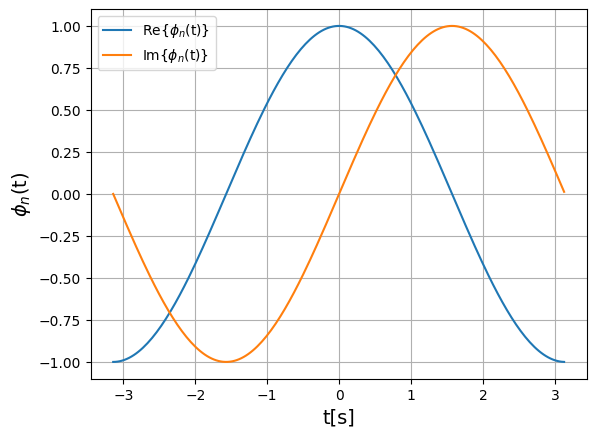

In [107]:
#se crean las bases de la serie exponencial compleja de Fourier
T = tf - ti #intervalo de interés
N = 20 #número armonicos a simular
wo = 2*np.pi/T # frecuencia fundamental
#Se crea la matriz de ceros para guardar bases
phin = np.zeros((len(tv),2*N+1),dtype=np.complex_)
for n in range(-N,N+1,1):
    phin[:,n+N] = np.exp(1j*n*wo*tv)#base de fourier en el intervalo de interés

# graficar bases
def pltbase(n=1):
    plt.plot(tv,np.real(phin[:,int(n+N)]),label="Re{$\phi_n$(t)}")
    plt.xlabel("t[s]",fontsize = 14)
    plt.ylabel("$\phi_n$(t)",fontsize = 14)
    plt.plot(tv,np.imag(phin[:,int(n+N)]),label="Im{$\phi_n$(t)}")
    plt.grid()
    plt.legend()
    plt.show()
    return
interact(pltbase,n=(-N,N,1))

plt.show()

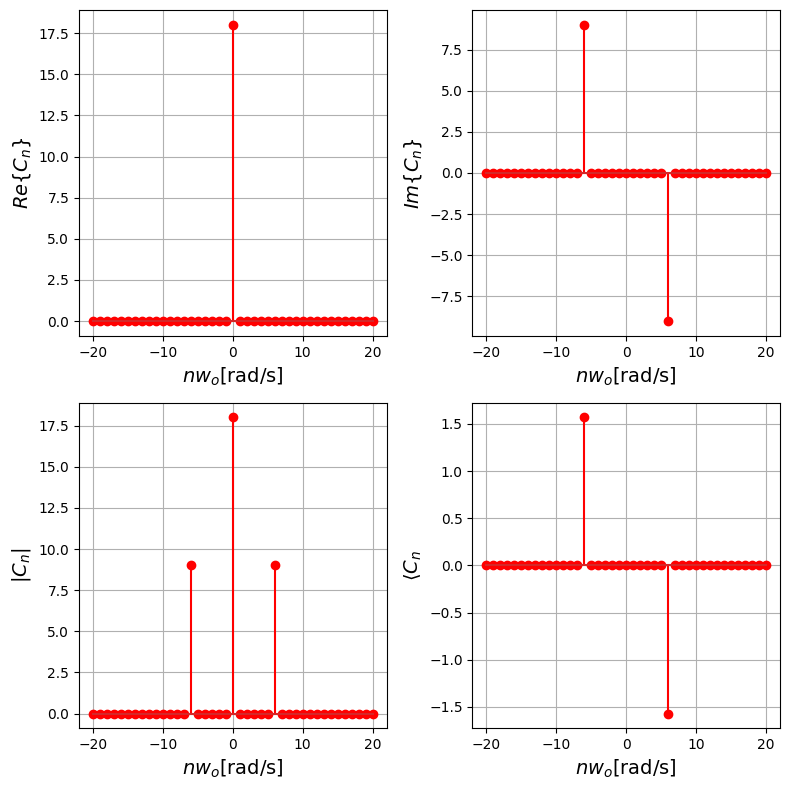

cn:  (41,)


In [108]:
#calcular espectro -> cambiar según la señal estudiada
cn = np.zeros(2*N+1,dtype=np.complex_)
nv = np.linspace(-N, N, 2*N+1) #Se crea el vector equidistante armónicos
cn[N] = 18 # nivel dc C_0
cn[N-6] = 9j #armónico -6
cn[N+6] = -9j #armónico +6

#graficar espectro
fig = plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.stem(nv, np.real(cn), 'r') #Grafica la parte real del espectro

plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$Re\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()
plt.subplot(2,2,2)
plt.stem(nv, np.imag(cn), 'r') #grafica la parte imaginaria del espectro
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$Im\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,3)
plt.stem(nv, abs(cn), 'r')#magnitud del espectro
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$|C_n|$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,4)
plt.stem(nv, np.angle(cn), 'r')#fase del espectro
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$\langle C_n$',fontsize = 14)
plt.axis('tight')
plt.grid()

fig.tight_layout()
plt.show()
print('cn: ', cn.shape)

In [111]:
Px = 486 # potencia señal x(t)


def pltest(Na=1):
    ind = range(N-Na,N+Na+1)
    er = 1- np.sum(abs(cn[ind])**2)/Px  #Se calcula el error relativo
    #señal reconstruida
    xe = phin[:,ind].dot(cn[ind] ) # dot calcula el producto entre vectores para obtener el error
    plt.plot(tv,xe,color='b',label='$x_e(t)$') # señal estimada o filtrada
    plt.plot(tv,x,color='r',label='$x(t)$') #señal original
    plt.title('E_r=%.2f[%%]' % (100*er),fontsize=16)
    plt.xlabel('t[s]')
    plt.ylabel('x(t)')
    plt.grid()
    plt.legend()
    plt.show()
    return

interact(pltest,Na=(0,N,1))


interactive(children=(IntSlider(value=1, description='Na', max=20), Output()), _dom_classes=('widget-interact'…

<function __main__.pltest(Na=1)>

**PUNTO 2.2**
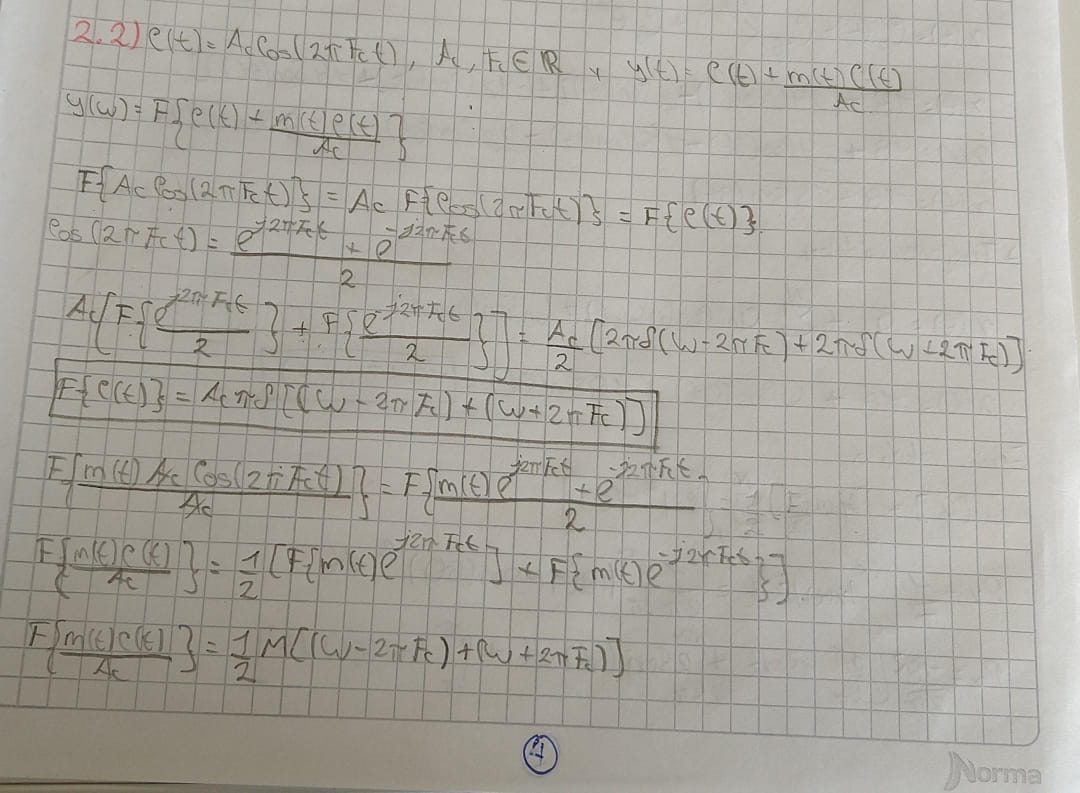
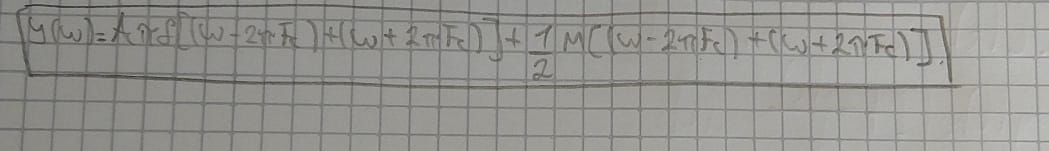

In [110]:
#simulación con canción de youtube
import soundfile as sf # para instalar pip install soundfile
from IPython.display import Audio #librería para reproducir audio

#instalar api youtube-dl (Es para instalar paquetes de audio)
! pip install youtube-dl
#descargar canción de interés
link="https://music.youtube.com/watch?v=H583WMbvSH4"
! youtube-dl --extract-audio -o "audio.%(mp3)s" --audio-format mp3  {link}  #Descargar la cancion en formato .mp3

[youtube] H583WMbvSH4: Downloading webpage
[download] Destination: audio.NA
[download] 100% of 4.62MiB in 01:07
[ffmpeg] Destination: audio.mp3
Deleting original file audio.NA (pass -k to keep)


In [ ]:
#convertir a .wav con ffmpeg para extraer audio en python (para que el audio sea compatiple con python)
!ffmpeg -i audio.mp3 output.wav

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [104]:
#instalar soundfile para cargar .wav
!pip install soundfile

In [105]:
#leer archivo wav
nombre_out = "output.wav"
xa, fs = sf.read(nombre_out)
# read speech signal from file
print('Frecuencia de muestreo %.2f[Hz]\naudio %s' % (fs,nombre_out))

LibsndfileError: ignored

In [ ]:
xpro = xa.copy() #copia los archivos de la cancion para procesar 5 segundos de la canción
ti = 20 #tiempo incio a procesar seg
tf = 25 #tiempo final a procesar seg
m = xpro[int(ti*fs):int((tf*fs)),0] #señal mensaje en primer canal

#repoducir fragmento original #señal mensaje
Audio(m,rate=fs)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


#Graficar eñal mensaje en tiempo y frecuencia
tt = np.arange(ti,tf,1/fs) #Se crea un vector de tiempo
plt.plot(tt,m) #graficar señal mensaje en el tiempo
plt.xlabel('$tiempo [s]$')
plt.ylabel('$m(t)$')
plt.show()

In [ ]:
#Fourier señal mensaje
Mw = np.fft.rfft(m) # axis=0 permite aplicar fft por cada columna de xpro
vf = np.fft.rfftfreq(m.shape[0],1/fs) #se crea el vector de frecuencias
plt.plot(vf,abs(Mw))#se grafica la magnitud
plt.title(r'Espectro señal mensaje')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$|M[f]|$',fontsize = 14)
plt.show()

In [ ]:
Fc = 16000 #frecuencia portadora
Im = 1 #Indice de modulacion
Ac = max(abs(m))/Im #amplitud de la portadora según índice de modulación
c = Ac*np.cos(2*np.pi*Fc*tt) #portadora

#repoducir portadora
Audio(c,rate=fs)

In [ ]:
#Señal portadora en tiempo y frecuencia
plt.plot(tt,c) #graficar señal mensaje en el tiempo
plt.xlabel('$tiempo [s]$')
plt.ylabel('$c(t)$')
plt.show()

In [ ]:
#Fourier señal portadora
Cw = np.fft.rfft(c) # axis=0 permite aplicar fft por cada columna de xpro
plt.plot(vf,abs(Cw))#se grafica la magnitud
plt.title(r'Espectro Portadora')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$|C[f]|$',fontsize = 14)
plt.show()

In [ ]:
#señal modulada
y = (1+m/Ac)*c #señal modulada en AM

#repoducir modulada
Audio(y,rate=fs)

In [ ]:
plt.plot(tt,y) #graficar señal mensaje en el tiempo
plt.xlabel('$tiempo [s]$')
plt.ylabel('$y(t)$')
plt.show()

In [ ]:
#Fourier señal modulada
Yw = np.fft.rfft(y) # axis=0 permite aplicar fft por cada columna de xpro
plt.plot(vf,abs(Yw))#se grafica la magnitud
plt.title(r'Espectro modulada')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$|Y[f]|$',fontsize = 14)
plt.show()

**PUNTO 2.3**

In [ ]:
#librerias
import scipy.io as sio  # Mestra las clases disponibles en el diccionario
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import warnings
from sklearn.metrics import pairwise_distances
import matplotlib
from sklearn.model_selection import train_test_split

warnings.filterwarnings('ignore')

#data downloaded for google drive
FILEID = "1IC11LrPCZIo_Am5eXP2p2tDAlrGTlPjn"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O datos.zip && rm -rf /tmp/cookies.txt
!unzip -o datos.zip
!dir

In [ ]:
# Cargar los datos desde el archivo .mat
path_ = 'CaractCE.mat'  #Se le crea una variable a la ruta o archivo
dicX = sio.loadmat(path_)

In [ ]:
Xt = dicX['F'] #Se crea una matriz con los datos de las señales en el tiempo
Fs = 12000 #frecuencia de muestreo
Tl = Xt.shape[1]/Fs #Se obtiene el tamaño de muestreo de los segmento dividiendo el tamaño de las columnas con la frecuencia de muestreo
print('Xt shape:', Xt.shape)
print('tiempo [s]', Tl)

Y = dicX['E']
Ytrue = Y[:,2] #clases fallos en los rodamientos

labels_ = ['NOR','IR1_0.007´´','IR1_0.014´´','IR1_0.021´´',
           'IR2_0.007´´','IR2_0.014´´','IR2_0.021´´',
           'BE_0.007´´','BE_0.014´´','BE_0.021´´'
           ] #nombres de las clases

In [ ]:
print(Ytrue.shape) #etique membresia de los datos 10 posibles valores
print(np.unique(Ytrue)) #Identifica y extrae los valores unicos de Ytrue

In [ ]:
#partir datos para train y test
Xtrain, Xtest, Ytrain, Ytest = train_test_split(Xt, Ytrue, test_size=0.3) #Divide los vectores y matrices dentro de subconjuntos aleatorios de entrenamiento y prueba
'''Xtrain es un subconjunto de datos aleatorios de entrenamiento de Xt.
Ytrain es un subconjunto de datos aleatorios de entrenamiento de Ytrue.
Ytest es un subconjunto de datos aleatorios de prueba de Ytrue.'''

print(f"Xtrain shape {Xtrain.shape}, Ytrain shape {Ytrain.shape }Xtest shape {Xtest.shape} ")

In [ ]:
#calcular espectro de Fourier Xtrain
vf = np.fft.rfftfreq(Xtrain.shape[1],1/Fs) #Se crea un vector de freciencia
Xw = (abs(np.fft.rfft(Xtrain))) # FFT
Xw.shape

In [ ]:
#graficar espectro para clases representativas
sca_ = MinMaxScaler() #Se transforman las caracteristicas escalando cada una de ellas a un rango generalmente netre [0,1]
Xw_ = sca_.fit_transform(Xw.T).T

#red = TSNE(perplexity = 15,n_components=2,random_state=123,learning_rate='auto',init='pca')
red = PCA(n_components=2) #Se hace una reduccion usando un metodo de reduccion dimencinal sin perdida de la informacion
Z = red.fit_transform(Xw_)  #Transforma y almacena la red

plt.scatter(Z[:,0],Z[:,1], c=Ytrain, label='Xtrain')
plt.colorbar()
plt.show()

In [ ]:
np.unique(Ytrain) #Identificar y extraer valores unicos de categorias almacenadas en Ytrain

In [ ]:
#graficar señales en tiempo y en frecuencia desde Xtrain y Ytrain

nrows = 2 #N° de filas
ncols = 5 #N° de columnas

#grafica en el tiempo señales promedio por clase
fig, ax = plt.subplots(nrows = nrows, ncols = ncols,
                       sharex = True, sharey=True, figsize=(10,5))
tv = np.arange(0,Tl,1/Fs) #Se crea un vector de tiempo
for i in range(nrows):
  for j in range(ncols):
     ax[i,j].plot(tv,Xtrain[Ytrain==ncols*i+j+1].mean(axis=0))
     ax[i,j].set_title(labels_[ncols*i+j])
     #print('Xtrain[Ytrain==ncols*i+j+1].mean(axis=0):', Xtrain[Ytrain==ncols*i+j+1].mean(axis=0))
ax[1,0].set_xlabel('t [s]')
ax[1,0].set_ylabel(' x(t)')
plt.tight_layout()
plt.show()


'''print('Xtrain: ', Xtrain)
print('Xtrain.shape: ', Xtrain.shape)
print('Xtrain[Ytrain==ncols*i+j+1].mean(axis=0):', Xtrain[Ytrain==ncols*i+j+1].mean(axis=0))
print('Xtrain[Ytrain==ncols*i+j+1].mean(axis=0).shape:', Xtrain[Ytrain==ncols*i+j+1].mean(axis=0).shape)
print('Ytrain: ', Ytrain)
print('Ytrain.shape: ', Ytrain.shape)'''

In [ ]:
#grafica frecuencia - señales promedio por clase
fig, ax = plt.subplots(nrows = nrows, ncols = ncols,
                       sharex = True, sharey=True, figsize=(10,5))
tv = np.arange(0,Tl,1/Fs)
for i in range(nrows):
  for j in range(ncols):
     ax[i,j].plot(vf,abs(Xw_[Ytrain==ncols*i+j+1]).mean(axis=0))
     ax[i,j].set_title(labels_[ncols*i+j])
ax[1,0].set_xlabel('f [Hz]')
ax[1,0].set_ylabel(' |X(f)|')
plt.tight_layout()
plt.show()

In [ ]:
from scipy.spatial.distance import cdist
#fft Xtest
Xwt = (abs(np.fft.rfft(Xtest))) # FFT
Xwt_ = sca_.fit_transform(Xwt.T).T

Dtr_te = cdist(Xw_,Xwt_)
Dtr_te.shape #distancias espectros Xtrain vs Xtest

In [ ]:
ind_ = np.argmin(Dtr_te,axis=0)
ind_.shape

In [ ]:
from sklearn.metrics import accuracy_score
Ytest_e = Ytrain[ind_]
print(f"ACC={accuracy_score(Ytest,Ytest_e)}")